In [91]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D




In [87]:
""" epochs_batch """
# Open the input file and read the content
with open('epochs_batch.txt', 'r') as file:
    data = file.read()
# Create lists to hold the parsed data
headers = ['Language', 'Neurons', 'Layer', 'Batch Size', 'Epochs', 'Max Memory (KB)', 'CPU Usage', 'Time']
rows = []

# Define the regex pattern
stats_pattern = r'(Haskell|Python): Stats for neurons: (\d+(?:,\d+)*), batchsize: (\d+) and epochs: (\d+).*?Max memory: (\d+) KB\nCPU usage: (\d+)%\nTime: ([\d\.]+)'

# Extract the stats
for match in re.finditer(stats_pattern, data, re.DOTALL):
    language, neurons, batch_size, epochs, max_memory, cpu_usage, time = match.groups()
    layers = len(neurons.split(','))
    neurons = neurons[0]
    rows.append([language, neurons, layers, batch_size, epochs, max_memory, cpu_usage, time])

# Write the extracted data to a CSV file
with open('epochs_batch.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(rows)
print("CSV file created successfully.")

CSV file created successfully.


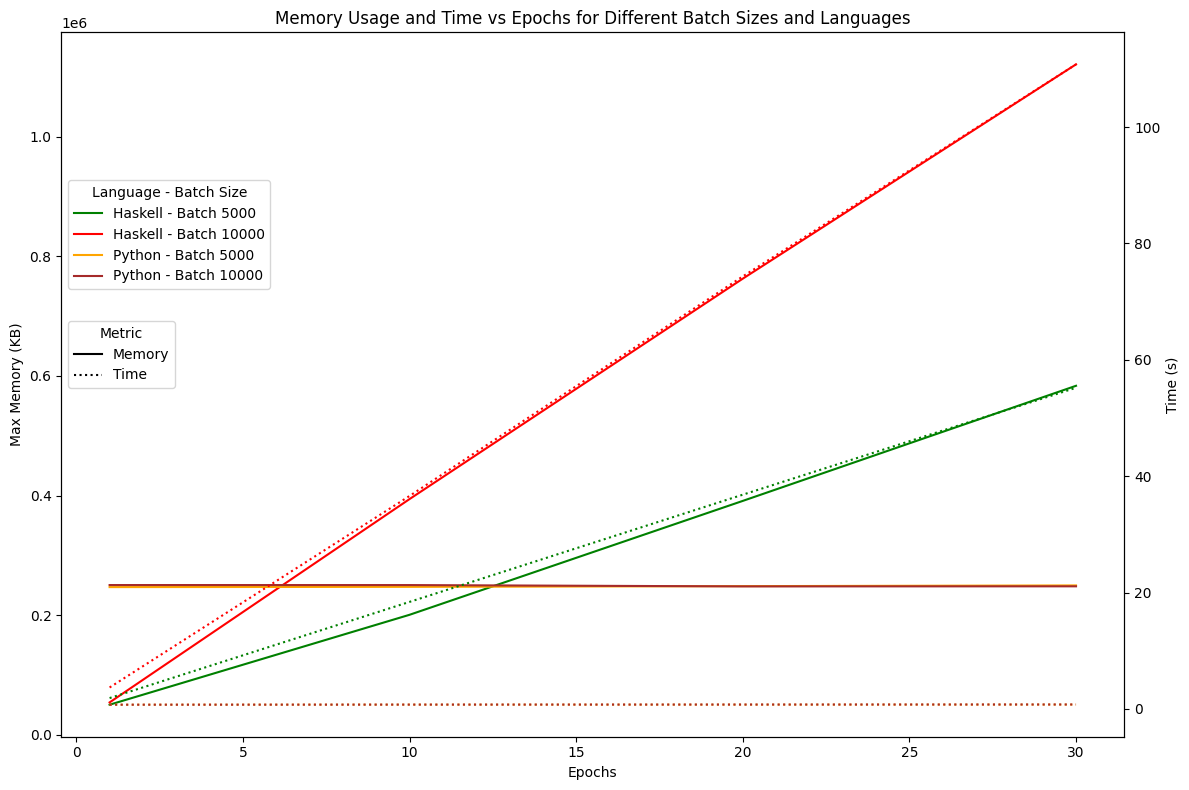

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read the CSV file
df = pd.read_csv('epochs_batch.csv')

# Filter out batch size 1
df = df[df['Batch Size'] != 1]

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a second y-axis
ax2 = ax1.twinx()

# Define colors for each batch size/language pair
colors = {
    ('Haskell', 5000): 'green',
    ('Haskell', 10000): 'red',
    ('Python', 5000): 'orange',
    ('Python', 10000): 'brown'
}

# Plot lines for each batch size/language pair
for (lang, batch), group in df.groupby(['Language', 'Batch Size']):
    color = colors[(lang, batch)]
    
    # Plot Max Memory (solid line)
    ax1.plot(group['Epochs'], group['Max Memory (KB)'], color=color, linestyle='-')
    
    # Plot Time (dotted line)
    ax2.plot(group['Epochs'], group['Time'], color=color, linestyle=':')

# Set labels and title
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Max Memory (KB)')
ax2.set_ylabel('Time (s)')
plt.title('Memory Usage and Time vs Epochs for Different Batch Sizes and Languages')

# Create custom legend for language/batch size pairs
legend_elements = [Line2D([0], [0], color=color, label=f"{lang} - Batch {batch}")
                   for (lang, batch), color in colors.items()]

# Create custom legend for line styles
line_style_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='Memory'),
    Line2D([0], [0], color='black', linestyle=':', label='Time')
]

# Add legends
first_legend = ax1.legend(handles=legend_elements, title='Language - Batch Size', loc='upper left', bbox_to_anchor=(0, 0.8))
ax1.add_artist(first_legend)  # Add the first legend as a separate artist

ax1.legend(handles=line_style_elements, title='Metric', loc='upper left', bbox_to_anchor=(0, 0.6))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [109]:
""" epochs_batch """
# Open the input file and read the content
with open('depth_neurons.txt', 'r') as file:
    data = file.read()
# Create lists to hold the parsed data
headers = ['Language', 'Neurons', 'Layer', 'Batch Size', 'Epochs', 'Max Memory (KB)', 'CPU Usage', 'Time']
rows = []

# Define the regex pattern
stats_pattern = r'(Haskell|Python): Stats for neurons: (\d+(?:,\d+)*), batchsize: (\d+) and epochs: (\d+).*?Max memory: (\d+) KB\nCPU usage: (\d+)%\nTime: ([\d\.]+)'

# Extract the stats
for match in re.finditer(stats_pattern, data, re.DOTALL):
    language, neurons, batch_size, epochs, max_memory, cpu_usage, time = match.groups()
    layers = len(neurons.split(','))
    neurons = neurons.split(',')[0]
    rows.append([language, neurons, layers, batch_size, epochs, max_memory, cpu_usage, time])

# Write the extracted data to a CSV file
with open('depth_neurons.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(rows)
print("CSV file created successfully.")

CSV file created successfully.


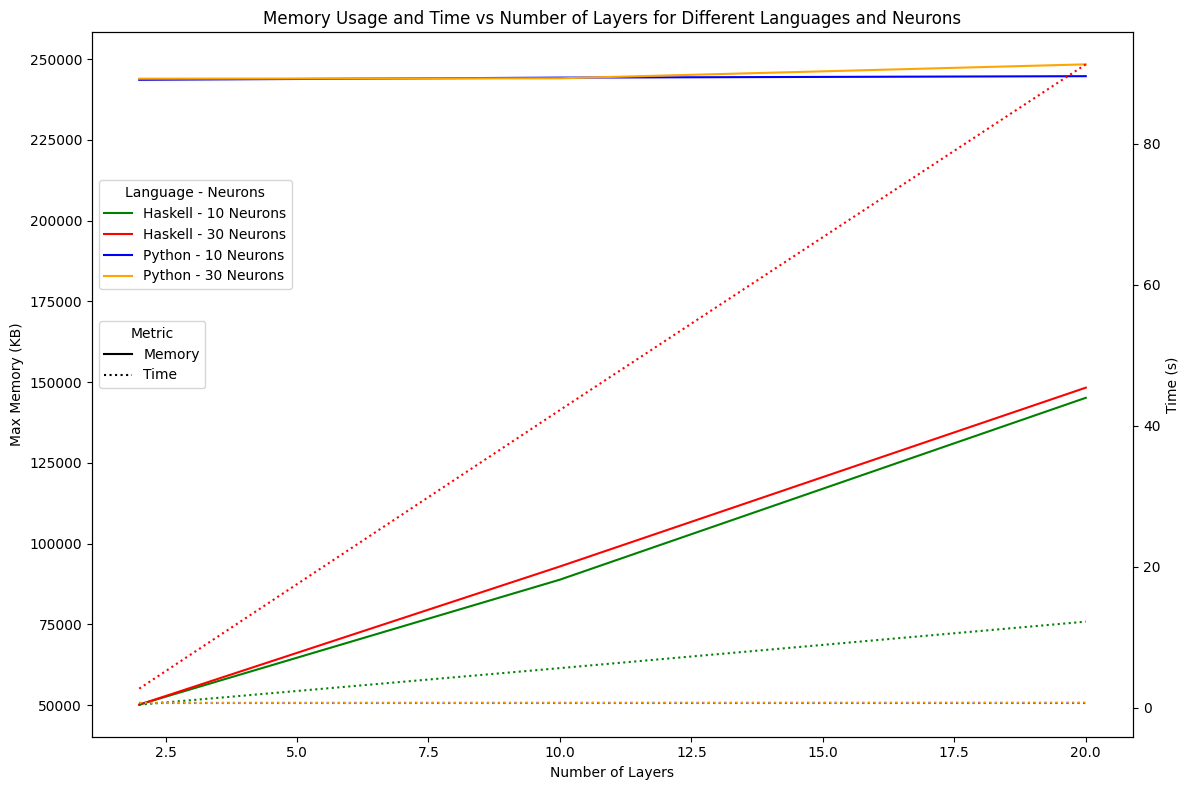

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read the CSV file
df = pd.read_csv('depth_neurons.csv')

# Filter for neurons 10 and 30
df = df[df['Neurons'].isin([10, 30])]

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create a second y-axis
ax2 = ax1.twinx()

# Define colors for each language/neurons pair
colors = {
    ('Haskell', 10): 'green',
    ('Haskell', 30): 'red',
    ('Python', 10): 'blue',
    ('Python', 30): 'orange'
}

# Plot lines for each language/neurons pair
for (lang, neurons), group in df.groupby(['Language', 'Neurons']):
    color = colors[(lang, neurons)]
    
    # Sort the group by Layer to ensure correct line plotting
    group = group.sort_values('Layer')
    
    # Plot Max Memory (solid line)
    ax1.plot(group['Layer'], group['Max Memory (KB)'], color=color, linestyle='-')
    
    # Plot Time (dotted line)
    ax2.plot(group['Layer'], group['Time'], color=color, linestyle=':')

# Set labels and title
ax1.set_xlabel('Number of Layers')
ax1.set_ylabel('Max Memory (KB)')
ax2.set_ylabel('Time (s)')
plt.title('Memory Usage and Time vs Number of Layers for Different Languages and Neurons')

# Create custom legend for language/neurons pairs
legend_elements = [Line2D([0], [0], color=color, label=f"{lang} - {neurons} Neurons")
                   for (lang, neurons), color in colors.items()]

# Create custom legend for line styles
line_style_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='Memory'),
    Line2D([0], [0], color='black', linestyle=':', label='Time')
]

# Add legends
first_legend = ax1.legend(handles=legend_elements, title='Language - Neurons', loc='upper left', bbox_to_anchor=(0, 0.80))
ax1.add_artist(first_legend)  # Add the first legend as a separate artist

ax1.legend(handles=line_style_elements, title='Metric', loc='upper left', bbox_to_anchor=(0, 0.60))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()